In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv', usecols=['Age','Cholesterol','HeartDisease'])

In [3]:
df.head()

,Age,Cholesterol,HeartDisease
0,40,289,0
1,49,180,1
2,37,283,0
3,48,214,1
4,54,195,0


In [4]:
df.describe()

,Age,Cholesterol,HeartDisease
count,918.000000,918.000000,918.000000
mean,53.510893,198.799564,0.553377
std,9.432617,109.384145,0.497414
min,28.000000,0.000000,0.000000
25%,47.000000,173.250000,0.000000
50%,54.000000,223.000000,1.000000
75%,60.000000,267.000000,1.000000
max,77.000000,603.000000,1.000000


In [5]:
X = df[['Age','Cholesterol']]
y = df['HeartDisease']

In [6]:
X

,Age,Cholesterol
0,40,289
1,49,180
2,37,283
3,48,214
4,54,195
...,...,...
913,45,264
914,68,193
915,57,131
916,57,236


In [7]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)

X_train.shape, X_test.shape

((642, 2), (276, 2))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled

array([[ 1.17692685, -1.82963318],
       [ 0.96817232,  0.29682176],
       [-0.59748669, -1.82963318],
       ...,
       [ 2.11632226, -1.82963318],
       [-0.17997762,  0.59799348],
       [-0.80624123,  0.36070667]])

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
X_train_scaled

,Age,Cholesterol
0,1.176927,-1.829633
1,0.968172,0.296822
2,-0.597487,-1.829633
3,0.341909,0.552361
4,-1.014996,0.232937
...,...,...
637,0.133154,0.041282
638,-0.179978,0.105167
639,2.116322,-1.829633
640,-0.179978,0.597993


In [13]:
np.round(X_train.describe(), 1)

,Age,Cholesterol
count,642.0,642.0
mean,53.7,200.5
std,9.6,109.7
min,28.0,0.0
25%,47.0,177.0
50%,54.0,221.5
75%,60.8,269.0
max,77.0,603.0


In [14]:
np.round(X_train_scaled.describe(), 1)

,Age,Cholesterol
count,642.0,642.0
mean,0.0,0.0
std,1.0,1.0
min,-2.7,-1.8
25%,-0.7,-0.2
50%,0.0,0.2
75%,0.7,0.6
max,2.4,3.7


# Effect of Standardization

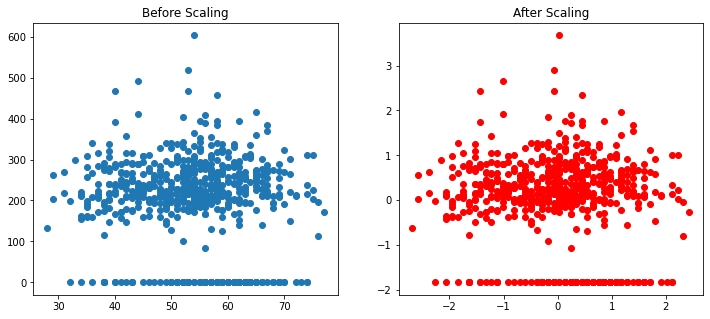

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['Cholesterol'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['Cholesterol'],color='red')
ax2.set_title("After Scaling")

plt.show()

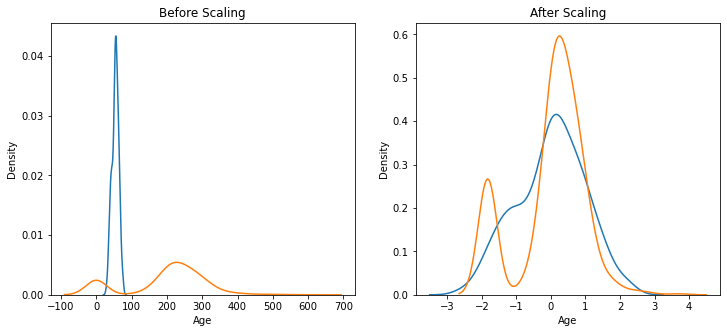

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['Cholesterol'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['Cholesterol'], ax=ax2)

plt.show()

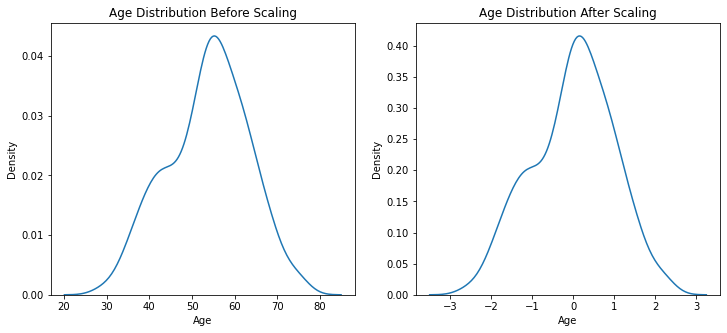

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

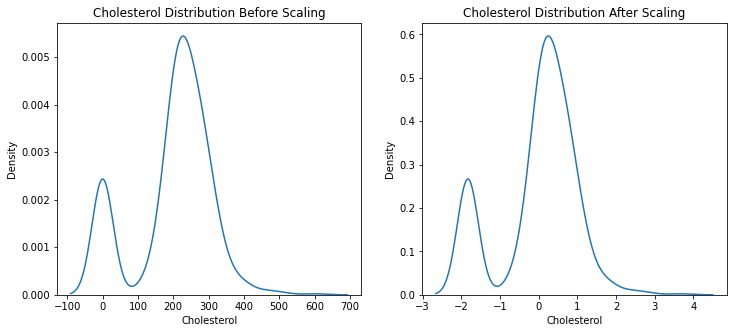

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Cholesterol Distribution Before Scaling')
sns.kdeplot(X_train['Cholesterol'], ax=ax1)

# after scaling
ax2.set_title('Cholesterol Distribution After Scaling')
sns.kdeplot(X_train_scaled['Cholesterol'], ax=ax2)
plt.show()